# Problema 3.1

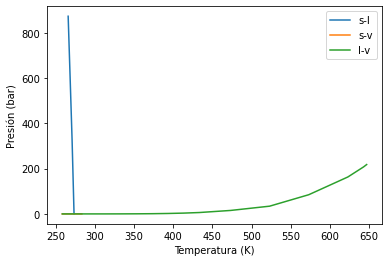

In [ ]:
import numpy as np # importo numpy con el alias np
import matplotlib.pyplot as plt # importo pyplot de matplotlib con el alias plt

p_sl = np.array([1,329,603,873]) #bar
T_sl = np.array([0,-2.5,-5.0,-7.5]) #ºC
p_sv = np.array([165.29,259.94,401.23,603.85,1132]) #Pa
T_sv = np.array([-15.0,-10.0,-5.0,0,10]) #ºC
p_lv = np.array([0.0019,0.0028,0.006,0.023,0.072,0.2,0.47,1.0,1.96,3.57,6.1,15.3,34.2,84.8,163.2,207.5,218]) #bar
T_lv = np.array([-15,-10,0,20,40,60,80,100,120,140,160,200,250,300,350,370,374]) #ºC
#Ahora hay que pasar todo a K y bar
T_sl = T_sl + 273.15 
T_sv = T_sv + 273.15
T_lv = T_lv + 273.15
p_sv = p_sv*1e-5
#Hagamos el grafico....
plt.plot(T_sl, p_sl,label='s-l')
plt.plot(T_sv,p_sv,label='s-v')
plt.plot(T_lv, p_lv,label='l-v')
plt.xlabel('Temperatura (K)') # Rótulo de eje horizontal
plt.ylabel('Presión (bar)') #Rótulo de eje vertical
plt.legend() #Para mostrar la leyenda de cada línea graficada
plt.show() #Para mostrar graficar la figura en pantalla

Tiene el diagrama de fase del agua la forma esperada?
Busque uno genércio para comparar...

Grafique ln(p) vs. 1/T  y p vs. T para la sublimación,  fusión y evaporización.

 ¿Qué tipo de comportamiento espera en cada figura? Justifique.


Aclaración sobre el armado de figuras:
Utilizar la función **subplots** de pyplot para definir los **objetos** "figura" y "ejes" asociados a nuestro plot. Llamaremos a estos "fig" y "ax", respectivamente.
Cosas sobre este punto: 
- Aunque querramos generar un único gráfico, usamos una función que se llama subplots. Como es un único gráfico, la invocamos sin argumentos, como plt.subplots() (notar el paréntesis vacío).- Aunque querramos generar un único gráfico (y de hecho solo queremos graficar un set de datos), graficar con matplotlib requiere definir dos cosas: una "figura" y un "eje". En otras palabras, la función subplots genera como resultado una tupla (un par ordenado "(a,b)") cuyo primer elemento es un objeto del tipo figura, y el segundo es uno del tipo eje (el significado de objeto en este contexto es más profundo de lo que podemos trabajar aquí, pero vayamos acostumbrándonos a la jerga).

Los datos a graficar propiamente dichos, se "agregan" al eje (que definimos como "ax"), con la función **plot**.

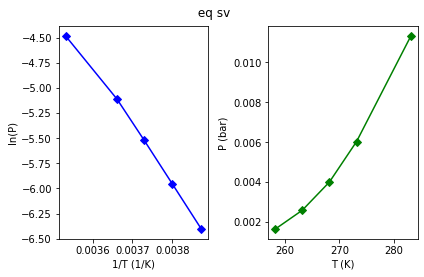

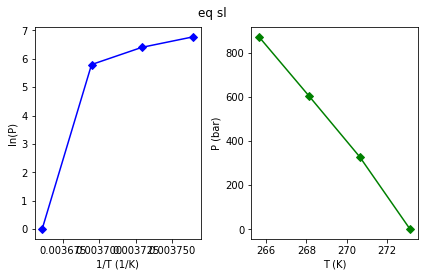

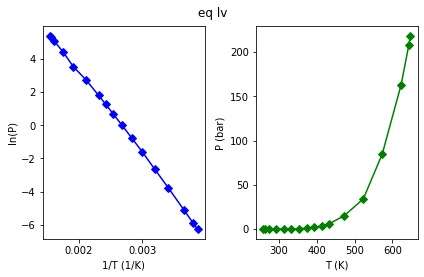

In [ ]:
T = (T_sv, T_sl, T_lv)
p = (p_sv,p_sl,p_lv)
tx = (' eq sv', 'eq sl', 'eq lv')
for i in range(0,3):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(tx[i])
    ax1.plot(1/T[i], np.log(p[i]), '-bD',label=tx[i])
    ax1.set(xlabel='1/T (1/K)', ylabel='ln(P)') # Rótulo de ejes
  #  plt.show() #Para mostrar graficar la figura en pantalla

    ax2.plot(T[i], p[i], '-gD',label=tx[i])
    ax2.set(xlabel='T (K)', ylabel='P (bar)') # Rótulo de ejes
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    #fig.tight_layout()
   # plt.legend() #Para mostrar la leyenda de cada línea graficada
 #   plt.show() #Para mostrar graficar la figura en pantalla

 Obtenga los valores de  $\Delta_{vap}H$, $\Delta_{sub}$ y $\Delta_{fus}$?
 ¿A partir de que figuras se puede obtener dichos valores?

Cacule la regresión lineal de los gráficos obtenidos previamente. ¿Cuáles son lineales? ¿Qué implica la pendiente en dichos casos?

Hay muchas opciones para realizar una regresión lineal...vamos a usar una función que después nos va a servir para la práctica de glutation. 

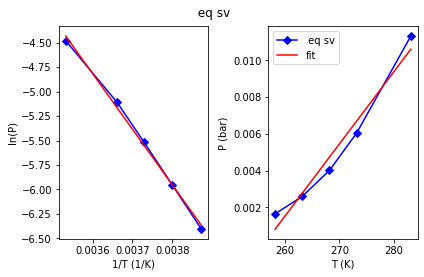

R2 del ajuste ln(P) vs 1/T: 0.9964943076286726
R2 del ajuste P vs T: 0.9629260235257748
El delta H si vale  Clausis Clapeyron: 46.995992467478814 kJ/mol


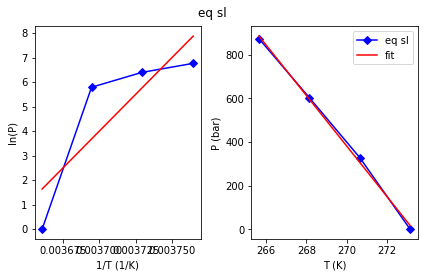

R2 del ajuste ln(P) vs 1/T: 0.7112607597002503
R2 del ajuste P vs T: 0.9976921478076599
El delta H si vale  Clausis Clapeyron: -502.41732026711884 kJ/mol


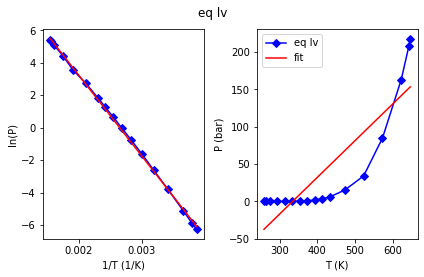

R2 del ajuste ln(P) vs 1/T: 0.9990217091368134
R2 del ajuste P vs T: 0.7530638010463495
El delta H si vale  Clausis Clapeyron: 41.319610907813455 kJ/mol


In [ ]:
from scipy.optimize import curve_fit #para hacer ajustes
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
from sklearn.metrics import r2_score #para computarle el R2 a los ajustes 

def reglineal(x,a,b):  #defino una función para la regresión lineal
  yfit = []
  for i in x:
    y=a*i+b
    yfit.append(y)
  return yfit


aln=[]
bln=[]
a=[]
b=[]

for i in range (0,3):
 fig, (ax1, ax2) = plt.subplots(1, 2)
 fig.suptitle(tx[i])
##Para ln P vs 1/T
 val,pcv = curve_fit(reglineal,1/T[i], np.log(p[i]))   #la función curvefit devuelve dos cosas: una lista de parámetros y una de covarianzas
 aln.append(val[0])
 bln.append(val[1])
 ax1.plot(1/T[i], np.log(p[i]), '-bD',label=tx[i])
 y=reglineal(1/T[i],aln[i],bln[i])  #calculo la funcion fiteada
 R2ln=(r2_score(np.log(p[i]), y)) # calculo el R2  de la regresion
 ax1.plot(1/T[i], y, '-r',label='fit')
 ax1.set(xlabel='1/T (1/K)', ylabel='ln(P)') 

 #Para p vs T
 val,pcv = curve_fit(reglineal,T[i], p[i]) 
 a.append(val[0])
 b.append(val[1]) 
 ax2.plot(T[i], p[i], '-bD',label=tx[i])
 y=reglineal(T[i],a[i],b[i])   #calculo la funcion fiteada
 R2=(r2_score(p[i], y)) # calculo el R2  de la regresion
 ax2.plot(T[i], y, '-r',label='fit')
 ax2.set(xlabel='T (K)', ylabel='P (bar)') # Rótulo de ejes
 fig.tight_layout(rect=[0, 0.03, 1, 0.95])
 plt.legend()
 plt.show()
 print("R2 del ajuste ln(P) vs 1/T:", R2ln)
 print("R2 del ajuste P vs T:", R2)
 print('El delta H si vale  Clausis Clapeyron:',-aln[i]*8.314/1000,'kJ/mol' )


Los tres dH obtenidos tienen significado físico?

En caso de que no sea asi...como lo obtendría? ¿Por que falla Clausis Clapeyron?

In [ ]:
#Datos que puede ser utilies...Pendiente de P vs T
print('pendiente de p vs T')
for i in range (0,3):
  print(tx[i], a[i], 'bar/K')


pendiente de p vs T
 eq sv 0.00039146864905260025 bar/K
eq sl -115.6000008109877 bar/K
eq lv 0.4901851436402361 bar/K


**Más datos...**

$\rho_{hielo}$= 0.92 $g.cm^{-3}$ 

$\rho_{liq}$= 1 $g.cm^{-3}$

$p_c$ = 218 bar

$T_c$ = 374 ºC